## Observations and Insights 

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_data = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="inner")


# Display the data table for preview
combined_mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice.
mouse_count = len(combined_mouse_study_data["Mouse ID"].unique())
mouse_count



249

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_study_data.drop_duplicates(subset= ['Mouse ID','Timepoint'] , keep= "first")
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 

single_duplicate_mouseid = combined_mouse_study_data.loc[combined_mouse_study_data.duplicated(keep='first')]

single_duplicate_mouseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse = combined_mouse_study_data.drop_duplicates(subset= ['Mouse ID','Timepoint'], keep= "first")




#combined_mouse_study_data.drop_duplicates(self, subset: Union[Hashable, Sequence[Hashable], NoneType] = None

clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [122]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

clean_mouse.groupby(['Drug Regimen']).agg(mean_tumor=('Tumor Volume (mm3)',np.mean),
                                          median_tumor=('Tumor Volume (mm3)',np.median),
                                          variance_tumor=('Tumor Volume (mm3)',np.var),
                                          stdv_tumor=('Tumor Volume (mm3)',np.std),
                                          sem_tumor = ('Tumor Volume (mm3)',st.sem))



,mean_tumor,median_tumor,variance_tumor,stdv_tumor,sem_tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

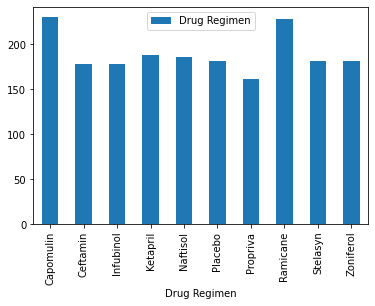

In [99]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


#plt.bar(x_axis, bars_in_cities, color="b", align="center")


mice_group = combined_mouse_study_data.groupby("Drug Regimen")
count_of_mice_group = pd.DataFrame(mice_group["Drug Regimen"].count())
mice_per_drug_plot = count_of_mice_group.plot(kind='bar')



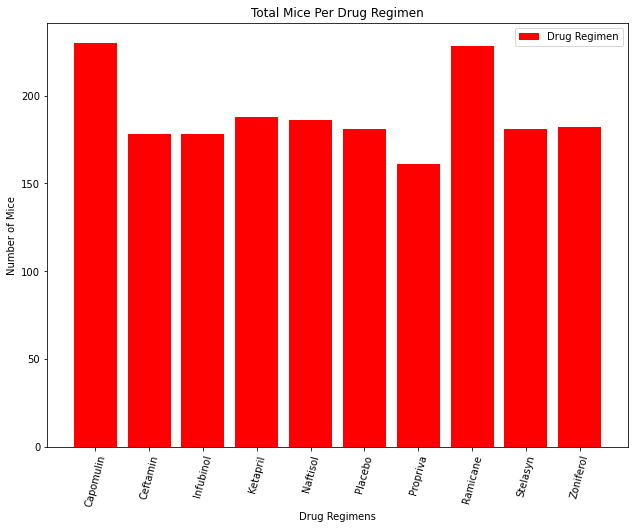

In [164]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


x_drug_regimen = np.arange(len(count_of_mice_group))
tick_locations = []
for x in x_drug_regimen:
    tick_locations.append(x)
plt.figure(figsize =([10.4, 7.8]))
plt.bar(x_drug_regimen,count_of_mice_group["Drug Regimen"],color="red",width = 0.80)
legend_label = ["Drug Regimen"]
plt.legend(legend_label,loc='upper right')
plt.title("Total Mice Per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.xticks(tick_locations,list(count_of_mice_group.index), rotation='75')
plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000218FB35F0B8>],
      dtype=object)

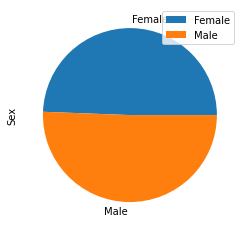

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex_group = combined_mouse_study_data.groupby("Sex")
count_of_mice_sex_group = pd.DataFrame(mice_sex_group["Sex"].count())
count_of_mice_sex_group.plot(kind='pie', subplots= True)



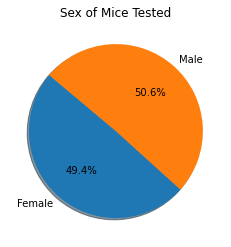

In [204]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex_labels = count_of_mice_sex_group["Sex"].index
mice_genders = count_of_mice_sex_group["Sex"]

plt.pie(mice_genders,
        labels = mice_sex_labels,
        autopct="%1.1f%%",
        shadow=True, 
        startangle=140)
plt.title("Sex of Mice Tested")
plt.show()





## Quartiles, Outliers and Boxplots

In [215]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin




# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint_group = clean_mouse.loc[clean_mouse["Timepoint"]==45]


last_greatest_timepoint_group


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


final_tumor_vol_per_mouse = pd.merge(last_greatest_timepoint_group,combined_mouse_study_data)

final_tumor_vol_per_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
125,y769,Ceftamin,Female,6,27,45,68.594745,4
126,y865,Ceftamin,Male,23,26,45,64.729837,3
127,z581,Infubinol,Female,24,25,45,62.754451,3
128,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
